### Vorticity

Navier Stokes for incompressible flow:

$$\frac{\partial u}{\partial t} + u \circ \nabla u = - \frac{1}{\rho} \nabla p + \nu \nabla ^2 u$$

Non-dimensional:

$$Re \left( \frac{\partial u ^{*}}{\partial t} + u^{*} \circ \nabla u^{*} \right) = - \nabla p^{*} + \nabla ^2 u^{*}$$

$u^{*}$ and $p^{*}$ are the non-dimensional velocity and pressure.

To obtain stokes flow we assume the reynolds number approaches zero:

$$0 = - \nabla p + \nabla ^2 u$$

Curl on both sides:

$$\nabla \times 0 = \nabla \times (-\nabla p + \nabla ^2 u)$$

LHS remains zero, first term on the RHS is:

$$\nabla \times - \nabla p = 0$$

Because $\nabla \times \nabla \phi = 0$ where $\phi$ is a scalar

Finally:

$$\nabla \times \nabla ^2 u = \nabla ^2 \omega$$

Where $\nabla \times u = \omega$ is vorticity

Combining everything we arrive at the simplified vorticity transport eqn for Stokes flow:

$$\nabla ^2 \omega = 0$$

### Stream function

Def stream func $\psi$ such that:

$$u = \frac{\partial \psi}{\partial y} \ and \ v = -\frac{\partial \psi}{\partial x}$$

In 2D we can write out the vorticity as:

$$\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}$$

Combined with the previous equation yields:

$$\nabla ^2 \psi = - \omega$$

System of two couple equations that can describe the fluid flow in a liquid driven cavity at very low Reynolds numbers:

$$\nabla ^2 \omega = 0$$
$$\nabla ^2 \psi = - \omega$$

Substituting we get:

$$\nabla ^4 \psi = 0$$

## Cavity flow

Lid of a square cavity moves at constant velocity of $u = 1$ with no fluid leaking out.  All of the surfaces have no-slip BCs.

BCs:

top : $\psi = 0$ and $\frac{\partial \psi}{\partial y} = 1$
bottom : $\psi = 0$ and $\frac{\partial \psi}{\partial y} = 0$
left : $\psi = 0$ and $\frac{\partial \psi}{\partial x} = 0$
right: $\psi = 0$ and $\frac{\partial \psi}{\partial x} = 0$

### Boundary conditions

One of the major hurdles with the vorticity streamline formula is the treatment of BCs

The BCs are all specified in terms of $\psi$ and its derivatives, but the Laplace eqn $\nabla \omega ^2 = 0$ has no $\psi$ value.  Instead we need a way to represent the BCs for $\omega$ in terms of $\psi$

Consider $\nabla ^2 \psi = - \omega$ along the top surface of the cavity.  No y velocity, so $\frac{\partial ^2 \psi}{\partial x^2}$ goes to zero and simplifies to:

$$\frac{\partial ^2 \psi}{\partial y^2} = - \omega$$

A 2nd order central diff gives:

$$\omega_j = - \left( \frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2} \right)$$

$\psi_{j+1} is outside the domain.  3rd order discretization of $\frac{\partial \psi}{\partial y}$ along the top:

$$\frac{\partial \psi}{\partial y} |_j = \frac{2 \psi_{j+1} + 3 \psi_j - 6 \psi_{j-1} + \psi_{j-2}}{6 \Delta y}$$

$$\frac{\partial \psi}{\partial y} |_j = u_j$$

So:

$$\psi_{j+1} = \frac{6 \Delta y u_j - 3 \psi_j + 6 \psi_{j-1} - \psi_{j-2}}{2}$$

BC of the top is then:

$$\omega_{i,j} = - \frac{1}{2 \Delta y^2} (8\psi_{i,j-1} - \psi_{i,j-2}) - \frac{3u_j}{\Delta y} + O(\Delta y^2)$$

In [2]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = 1 / (nx - 1)
dy = h / (ny - 1)

l1_target = 1e-6

In [4]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new - old))
    return norm

In [9]:
x = numpy.linspace(0, l, nx)
y = numpy.linspace(0, h, ny)

psi = numpy.zeros((ny, nx))
omega = numpy.zeros((ny, nx))
u = numpy.ones(nx)

#omega i,j
#omega[-1, 1:-1] = -1 / (2 * dy ** 2) * (8 * psi[-2, 1:-1] - psi[-3, 1:-1]) - (3 * u[1:-1] / dy)

$$\omega_{i,j} ^{k+1} = \frac{1}{4} (\omega_{i,j-1} ^k + \omega_{i,j+1} ^k + \omega_{i-1,j} ^k +\omega_{i+1,j} ^k)$$

$$\psi_{i,j} ^{k+1} = \frac{(\psi_{i+1,j} ^k + \psi_{i-1,j} ^k) \Delta y^2 + (\psi_{i,j+1} ^k + \psi_{i,j-1} ^k) \Delta x^2 + \omega_{i,j} ^k \Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}$$

BC at other points, since $u = 0$
$$-\frac{1}{2 \Delta y^2} (8 \psi_{i,j-1} - \psi_{i,j-2})$$

In [10]:
def coupled_solve(psi, omega, u, l1_target):
    
    #iter_diff = l1_target + 1
    l1norm = 1
    
    while iter_diff > l1_target:
        
        psin = psi.copy()
        omegan = omega.copy()
        
        psi[1:-1, 1:-1] = ((psin[1:-1, 2:] + psin[1:-1, :-2]) * dy ** 2 + (psin[2:, 1:-1] + psin[:-2, 1:-1]) * dx ** 2 + omega[1:-1, 1:-1] * dx ** 2 * dy ** 2) / (2 * (dx ** 2 + dy ** 2))
        
        omega[1:-1, 1:-1] = 0.25 * (omegan[:-2, 1:-1] + omegan[:2, 1:-1] + omegan[1:-1, :-2] + omegan[1:-1, 2:])
        
        #Neumann BCs
        omega[-1, 1:-1] = -1 / (2 * dy ** 2) * (8 * psi[-2, 1:-1] - psi[-3, 1:-1]) - (3 * u[1:-1] / dy) #top
        omega[0, 1:-1] = -1 / (2 * dy ** 2) * (8 * psi[-2, 1:-1] - psi[-3, 1:-1]) # bottom
        omega[1:-1, 0] = -1 / (2 * dy ** 2) * (8 * psi[-2, 1:-1] - psi[-3, 1:-1]) # left
        omega[1:-1, -1] = -1 / (2 * dy ** 2) * (8 * psi[-2, 1:-1] - psi[-3, 1:-1]) #right
        
        l1norm = L1norm(L1norm(psi, psin), L1norm(omega, omegan))
        
    return psi, omega
        

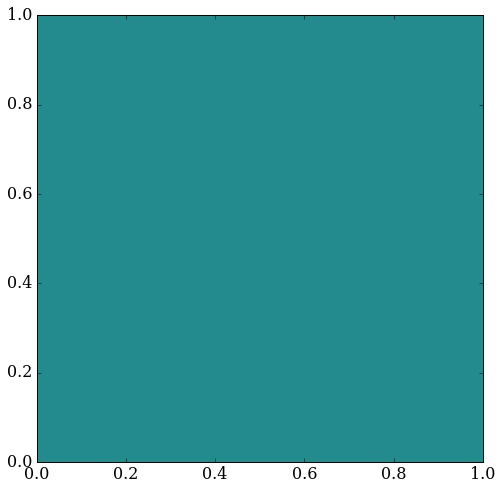

In [12]:
pyplot.figure(figsize = (8, 8))
pyplot.contourf(x, y, psi, 20, cmap = cm.viridis);